In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [20]:
data_dir = "/Users/Ankitha_0614/Desktop/cats_and_dogs_filtered/train"
categories = ["cats", "dogs"]

img_size = 64
data = []
labels = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_label = categories.index(category)
    
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(img_array, (img_size, img_size))
            data.append(resized_array.flatten())
            labels.append(class_label)
        except Exception as e:
            pass

X = np.array(data)
y = np.array(labels)

print("✅ Dataset loaded")
print("Dataset shape:", X.shape, "Labels:", y.shape)


✅ Dataset loaded
Dataset shape: (2000, 4096) Labels: (2000,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (1600, 4096)
Testing samples: (400, 4096)


In [22]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Model trained")
print("Accuracy:", accuracy_score(y_test, y_pred))


✅ Model trained
Accuracy: 0.505


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51       199
           1       0.51      0.50      0.51       201

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400



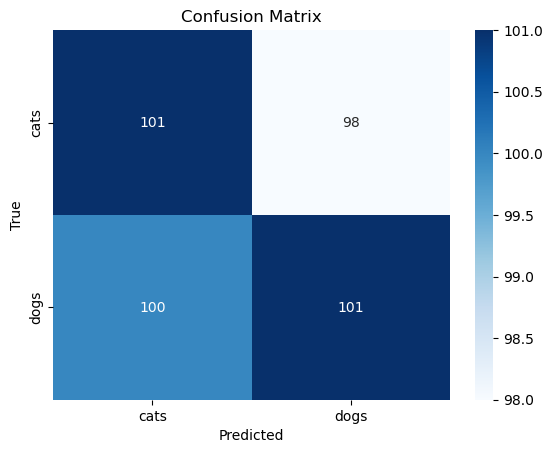

In [24]:
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [32]:
def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"❌ Image not found at {img_path}")
    img_resized = cv2.resize(img, (img_size, img_size)).flatten().reshape(1, -1)
    prediction = model.predict(img_resized)
    return categories[prediction[0]]

# 🔍 First, check which files exist in validation folder
val_path = "/Users/lahari_0614/Desktop/cats_and_dogs_filtered/validation/cats"
print("Sample files in validation/cats:", os.listdir(val_path)[:5])

# ✅ Use one of the shown files for testing
test_img = os.path.join(val_path, os.listdir(val_path)[0])
print("Prediction:", predict_image(test_img))


Sample files in validation/cats: ['cat.2042.jpg', 'cat.2056.jpg', 'cat.2081.jpg', 'cat.2095.jpg', 'cat.2268.jpg']
Prediction: dogs
